### STEP : Abundance Analysis
#### Taxonomic assignment with Silva 16S

Using Silva 16S classifier for Qiime2. List with all [classifiers](https://docs.qiime2.org/2020.6/data-resources/). 

#### Versions 
- [Silva 138 99% OTUs full-length sequences](https://data.qiime2.org/2020.6/common/silva-138-99-nb-classifier.qza)
- [Silva 138 99% OTUs from 515F/806R region of sequences](https://data.qiime2.org/2020.6/common/silva-138-99-515-806-nb-classifier.qza)
- [Greengenes 13_8 99% OTUs full-length sequences](https://data.qiime2.org/2020.6/common/gg-13-8-99-nb-classifier.qza)
- [Greengenes 13_8 99% OTUs from 515F/806R region of sequences](https://data.qiime2.org/2020.6/common/gg-13-8-99-515-806-nb-classifier.qza)

#### Methods
- [qiime feature-classifier](https://docs.qiime2.org/2022.2/plugins/available/feature-classifier/)
- [qiime feature-classifier classify-sklearn](https://docs.qiime2.org/2021.8/plugins/available/feature-classifier/classify-sklearn)
- [qiime metadata](https://docs.qiime2.org/2022.2/plugins/available/metadata/)
- [classify-hybrid-vsearch-sklearn](https://docs.qiime2.org/2022.2/plugins/available/feature-classifier/classify-hybrid-vsearch-sklearn/)
- [qiime metadata tabulate](https://docs.qiime2.org/2022.2/plugins/available/metadata/tabulate/)
- [qiime taxa](https://docs.qiime2.org/2022.2/plugins/available/taxa/)
- [qiime taxa barplot](https://docs.qiime2.org/2022.2/plugins/available/taxa/barplot/)

## Setup and settings

In [38]:
# Importing packages
import os
import pandas as pd
from qiime2 import Artifact
from qiime2 import Visualization
from qiime2 import Metadata

from qiime2.plugins.feature_table.methods import group
from qiime2.plugins.taxa.methods import collapse

import matplotlib.pyplot as plt

from utils import *

%matplotlib inline

In [39]:
# from qiime2.plugins import demux, deblur, quality_filter, \
#                            metadata, feature_table, alignment, \
#                            phylogeny, diversity, emperor, feature_classifier, \
#                            taxa, composition

### Receiving the parameters

The following cell can receive parameters using the [papermill](https://papermill.readthedocs.io/en/latest/) tool.

In [40]:
metadata_file = os.path.abspath(os.path.join(os.getcwd(), '..', 'data', 'raw', 'metadata', 'not-hist-feces-metadata.tsv'))
experiment_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'experiments', 'thayane-feces-01'))
img_folder = os.path.abspath(os.path.join(experiment_folder, 'imgs'))
replace_files = False

### Defining names, paths and flags

In [41]:
# QIIME2 Artifacts folder
qiime_folder = os.path.join(experiment_folder, 'qiime-artifacts')

# Input - DADA2 Artifacts
dada2_tabs_path = os.path.join(qiime_folder, 'dada2-tabs.qza')
dada2_reps_path = os.path.join(qiime_folder, 'dada2-reps.qza')
dada2_stat_path = os.path.join(qiime_folder, 'dada2-stat.qza')

# Input - Metataxonomy Artifacts
metatax_path = os.path.join(qiime_folder, 'metatax.qza')
# metatax_view_path = os.path.join(qiime_folder, 'metatax.qzv')
# metatax_bar_path = os.path.join(qiime_folder, 'metatax-bar.qzv')

# Flag - Load or create files
need_tax = not (os.path.isfile(metatax_path)) or replace_files

## Step execution

### Load input files

This Step import the QIIME2 `SampleData[PairedEndSequencesWithQuality]` Artifact with all demultiplexed sequences and the `Metadata` file.

In [42]:
#Load Metadata
metadata_qa = Metadata.load(metadata_file)

In [43]:
metatax = Artifact.load(metatax_path)
metatax_df = metatax.view(Metadata).to_dataframe()
metatax_df['Confidence'] = metatax_df['Confidence'].astype('float32')

tabs = Artifact.load(dada2_tabs_path)
tabs_df = tabs.view(Metadata).to_dataframe().T

In [44]:
tax_levels = ['Reino', 'Filo', 'Classe', 'Ordem', 'Família', 'Gênero', 'Espécie']
taxons_col = metatax_df['Taxon']
metatax_split_df = pd.DataFrame(columns=tax_levels)
metatax_split_df[tax_levels] = taxons_col.str.split(';', expand=True)
for t in tax_levels:
    metatax_split_df[t] = metatax_split_df[t].str.strip()

In [45]:
freq_tax_df = pd.merge(tabs_df, metatax_split_df, left_index=True, right_index=True)
freq_tax_df

,I1-M05,I10-M91,I11-M44,I12-M45,I13-M46,I14-M47,I15-M49,I16-M52,I17-M55,I18-M07,...,I75-M162,I76-M164,I8-M39,Reino,Filo,Classe,Ordem,Família,Gênero,Espécie
074b2d2eeb19288d75bf8e64784db602,0.0,786.0,0.0,1118.0,0.0,0.0,0.0,0.0,330.0,0.0,...,0.0,0.0,1263.0,d__Bacteria,p__Firmicutes,c__Clostridia,o__Lachnospirales,f__Lachnospiraceae,g__Agathobacter,None
6c3b33991621b6c3e04992794a55a3d9,0.0,1634.0,1228.0,1436.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,773.0,d__Bacteria,p__Firmicutes,c__Clostridia,o__Lachnospirales,f__Lachnospiraceae,g__Agathobacter,None
8b7f2e8ca48676f3a47dfa784c8a9efe,0.0,540.0,0.0,872.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,652.0,d__Bacteria,p__Firmicutes,c__Clostridia,o__Oscillospirales,f__Ruminococcaceae,g__Faecalibacterium,None
7a1d4d3ec513655bbe964c4ab022e6fe,0.0,0.0,444.0,0.0,52.0,574.0,0.0,0.0,0.0,0.0,...,1033.0,315.0,0.0,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Bacteroidaceae,g__Bacteroides,s__Bacteroides_vulgatus
b53b25874d0529b37d36bfc78e32c894,0.0,1464.0,1300.0,1210.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2022.0,621.0,d__Bacteria,p__Firmicutes,c__Clostridia,o__Lachnospirales,f__Lachnospiraceae,g__Agathobacter,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ee5a1924a299e186d7f904e5aa898bd1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,d__Bacteria,p__Firmicutes,c__Negativicutes,o__Veillonellales-Selenomonadales,f__Veillonellaceae,g__Dialister,None
143582bcba9a90e4a585ed60042a6f0d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,d__Bacteria,p__Firmicutes,c__Clostridia,o__Oscillospirales,f__Ruminococcaceae,g__Ruminococcus,None
c713157aa6936b23861463951dfb6a3b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,d__Bacteria,p__Firmicutes,c__Bacilli,o__Erysipelotrichales,f__Erysipelotrichaceae,g__Holdemanella,None
bd157fd42be3b6728d0080ee52836c14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,d__Bacteria,p__Firmicutes,c__Clostridia,o__Lachnospirales,f__Lachnospiraceae,g__Lachnospiraceae_UCG-010,s__uncultured_organism


Shape: (2918, 2)

count    2918.000000
mean        0.942491
std         0.083970
min         0.413501
25%         0.909087
50%         0.989604
75%         0.999950
max         1.000000
Name: Confidence, dtype: float64


<AxesSubplot:>

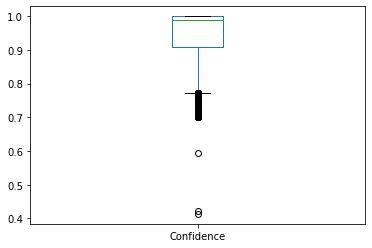

In [46]:
print(f'Shape: {metatax_df.shape}\n')
print(metatax_df['Confidence'].describe())
metatax_df['Confidence'].plot.box()

                                       Taxon  Confidence
Feature ID                                              
97e89410e3c9d0a13c2fd7730d990227  Unassigned    0.593227
02ba22e521f905c237c6e89687d1739e  Unassigned    0.421703
347968eee0c29b8736adad7fb27be514  Unassigned    0.413501

Shape: (3, 2)

count    3.000000
mean     0.476144
std      0.101480
min      0.413501
25%      0.417602
50%      0.421703
75%      0.507465
max      0.593227
Name: Confidence, dtype: float64


<AxesSubplot:>

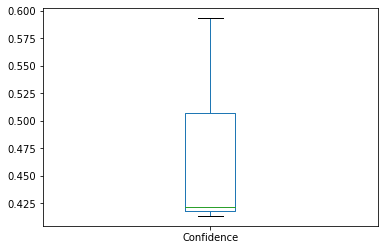

In [47]:
conf = metatax_df['Confidence']
tmp_df = metatax_df[(conf < .7)]
print(f'{tmp_df}\n')
print(f'Shape: {tmp_df.shape}\n')
print(tmp_df['Confidence'].describe())
tmp_df['Confidence'].plot.box()

In [48]:
metatax_df[metatax_df['Taxon']=='Unassigned']

,Taxon,Confidence
Feature ID,,
97e89410e3c9d0a13c2fd7730d990227,Unassigned,0.593227
02ba22e521f905c237c6e89687d1739e,Unassigned,0.421703
347968eee0c29b8736adad7fb27be514,Unassigned,0.413501


count    2915.000000
mean        0.942971
std         0.082626
min         0.700245
25%         0.910005
50%         0.989638
75%         0.999950
max         1.000000
Name: Confidence, dtype: float64


<AxesSubplot:>

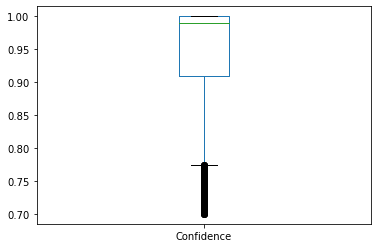

In [49]:
print(metatax_df[metatax_df['Taxon']!='Unassigned']['Confidence'].describe())
metatax_df[metatax_df['Taxon']!='Unassigned']['Confidence'].plot.box()

In [50]:
filtered_metatax_df = freq_tax_df[metatax_df['Taxon']!='Unassigned']
print(filtered_metatax_df.shape)

(2915, 73)


In [51]:
def get_samples_ids_by_group(m):    
    df = m.to_dataframe()
    return {i: df[df['class_meno']==str(i)].index for i in [0,1,2]}

def get_grouped_freq_tax(df, groups_ids, group):
    ndf = df[groups_ids[group]]
    return ndf

def get_features(df, features):
    return df[df.index.isin(features)]

In [52]:
# Separate by samples groups
groups = get_samples_ids_by_group(metadata_qa)
g0df = get_grouped_freq_tax(filtered_metatax_df, groups, group=0)
g1df = get_grouped_freq_tax(filtered_metatax_df, groups, group=1)
g2df = get_grouped_freq_tax(filtered_metatax_df, groups, group=2)

# Remove features with sum zero
g0df = g0df[g0df.sum(axis = 1) > 0]
g1df = g1df[g1df.sum(axis = 1) > 0]
g2df = g2df[g2df.sum(axis = 1) > 0]

In [53]:
tax_g0_df = get_features(filtered_metatax_df, g0df.index)
tax_g1_df = get_features(filtered_metatax_df, g1df.index)
tax_g2_df = get_features(filtered_metatax_df, g2df.index)

In [54]:
def unique_names(df, levels):
    import pandas as pd
    
    unique_names = {l: list(filter(None, df[l].unique())) for l in levels}
    return unique_names

ids = ['Reino', 'Filo', 'Classe', 'Ordem', 'Família', 'Gênero', 'Espécie']
cols = ['Reprodutivo', 'Transição', 'Pós-menopausa', 'Interseção']
groups = (tax_g0_df, tax_g1_df, tax_g2_df, filtered_metatax_df)
df = pd.DataFrame(index=ids, columns=cols)

for i in range(4):
    g = groups[i]
    for k, v in unique_names(g, tax_levels).items():
            df[cols[i]][k] = len(v)

print(df.to_latex())

\begin{tabular}{lllll}
\toprule
{} & Reprodutivo & Transição & Pós-menopausa & Interseção \\
\midrule
Reino   &           2 &         2 &             2 &          2 \\
Filo    &           9 &         8 &             9 &         10 \\
Classe  &          12 &        12 &            13 &         14 \\
Ordem   &          26 &        26 &            28 &         30 \\
Família &          46 &        44 &            49 &         53 \\
Gênero  &          98 &       104 &           112 &        137 \\
Espécie &          51 &        53 &            79 &         96 \\
\bottomrule
\end{tabular}



In [55]:
latex = f'''
\\begin{{table}}[H] \centering

{df.to_latex()}
\caption{{A tabela apresenta as quantas taxonomias distintas foram encontradas de cada uma das fases do ciclo reprodutivo e o total, considerando a interseção das fases. Os valores em cada linha são de um dos diferentes níveis taxonômicos.}}
    \label{{tab:tax-count}}
\end{{table}}
'''
print(latex)


\begin{table}[H] \centering

\begin{tabular}{lllll}
\toprule
{} & Reprodutivo & Transição & Pós-menopausa & Interseção \\
\midrule
Reino   &           2 &         2 &             2 &          2 \\
Filo    &           9 &         8 &             9 &         10 \\
Classe  &          12 &        12 &            13 &         14 \\
Ordem   &          26 &        26 &            28 &         30 \\
Família &          46 &        44 &            49 &         53 \\
Gênero  &          98 &       104 &           112 &        137 \\
Espécie &          51 &        53 &            79 &         96 \\
\bottomrule
\end{tabular}

\caption{A tabela apresenta as quantas taxonomias distintas foram encontradas de cada uma das fases do ciclo reprodutivo e o total, considerando a interseção das fases. Os valores em cada linha são de um dos diferentes níveis taxonômicos.}
    \label{tab:tax-count}
\end{table}



In [56]:
g0df

,I7-M36,I5-M37,I10-M91,I22-M60,I24-M67,I25-M69,I39-M98,I43-M103,I44-M105,I51-M116,I52-M117,I59-M129,I67-M143
074b2d2eeb19288d75bf8e64784db602,0.0,0.0,786.0,2515.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5232.0,0.0
6c3b33991621b6c3e04992794a55a3d9,0.0,0.0,1634.0,1384.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8b7f2e8ca48676f3a47dfa784c8a9efe,3095.0,0.0,540.0,0.0,0.0,0.0,0.0,0.0,0.0,148.0,0.0,0.0,0.0
7a1d4d3ec513655bbe964c4ab022e6fe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,558.0,2642.0,0.0,0.0
b53b25874d0529b37d36bfc78e32c894,0.0,0.0,1464.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2768bae087d0fb10cbf8a486a444b931,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f2ee0f6b708acf2284739b07bfb8a910,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
440b18f112d726951157996929988d38,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fa52840a8948f2b92eb37f273c919b00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
# Perform group by applying sum function
group_tab = group(tabs, metadata=metadata_qa.get_column('class_meno'), axis='sample', mode='sum').grouped_table

group_tab_df = group_tab.view(Metadata).to_dataframe()
group_tab_df

,074b2d2eeb19288d75bf8e64784db602,6c3b33991621b6c3e04992794a55a3d9,8b7f2e8ca48676f3a47dfa784c8a9efe,7a1d4d3ec513655bbe964c4ab022e6fe,b53b25874d0529b37d36bfc78e32c894,de1dfedd96859b1568df4edfc30dff9b,9182301e1a42f09bd5016aad44496c4a,3689595a73bd93c0301ac8956a15279e,53df627adf8340f26a37202ed7374f2e,a835129fb0fba121225f939f51049a86,...,440b18f112d726951157996929988d38,fa52840a8948f2b92eb37f273c919b00,890138d5a18e44b8337f1c60308d82a8,08c2a6ae87899aa52af5b1e4e706bca7,0c2c4652d0d65b835d97dddca0b3a102,ee5a1924a299e186d7f904e5aa898bd1,143582bcba9a90e4a585ed60042a6f0d,c713157aa6936b23861463951dfb6a3b,bd157fd42be3b6728d0080ee52836c14,7be16af1fd4a487fd9e6380727a69555
id,,,,,,,,,,,,,,,,,,,,,
2,8283.0,12499.0,8729.0,7407.0,8095.0,7234.0,6564.0,3589.0,4740.0,5207.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
0,8533.0,3018.0,3783.0,3200.0,1464.0,0.0,1958.0,1548.0,3901.0,954.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7042.0,3794.0,2615.0,3616.0,3232.0,5126.0,2612.0,4866.0,1310.0,3658.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [127]:
species_by_phase = collapse(group_tab, taxonomy=metatax, level=7).collapsed_table
species_by_phase_df = species_by_phase.view(Metadata).to_dataframe().T
species_by_phase_df['all'] = species_by_phase_df.sum(axis=1)
species_by_phase_df = species_by_phase_df.reset_index()
species_by_phase_df

id,index,2,0,1,all
0,d__Bacteria;p__Firmicutes;c__Clostridia;o__Lac...,58707.0,19047.0,20233.0,97987.0
1,d__Bacteria;p__Firmicutes;c__Clostridia;o__Osc...,98706.0,37268.0,35413.0,171387.0
2,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,9763.0,4021.0,6016.0,19800.0
3,d__Bacteria;p__Firmicutes;c__Clostridia;o__Lac...,55183.0,13317.0,23777.0,92277.0
4,d__Bacteria;p__Firmicutes;c__Negativicutes;o__...,25510.0,9062.0,5891.0,40463.0
...,...,...,...,...,...
331,d__Bacteria;p__Firmicutes;c__Clostridia;o__Osc...,12.0,0.0,0.0,12.0
332,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,0.0,8.0,0.0,8.0
333,d__Bacteria;p__Firmicutes;__;__;__;__;__,0.0,0.0,2.0,2.0
334,d__Bacteria;p__Firmicutes;c__Clostridia;o__Pep...,0.0,0.0,1.0,1.0


### Top abundances counts

In [128]:
def filter_names(df, level, invalid_words):
    tax_idx = level - 8
    to_remove = list()
    for i, r in df.iterrows():
        word = r['index'].split(';')[tax_idx][3:]
        invalid_flag = False
        for w in invalid_words:
            if w in word:
                invalid_flag = True
                break
        if invalid_flag:
            to_remove.append(i)
    df = df.drop(df.index[to_remove])
    return df

species_by_phase_df = filter_names(species_by_phase_df, 7, ('uncultured', 'microbiom', 'metagenome', 'human_', '_bacterium'))

In [137]:
species_by_phase_df['mean'] = species_by_phase_df[['0', '1', '2']].mean(axis=1)
species_by_phase_df.sort_values(by='all', ascending=False)
fname = os.path.join(experiment_folder, 'species-abundances-filtered.xlsx')
species_by_phase_df.to_excel(fname)

In [119]:
def top_counts(df, col_idx, top, filtering):
    indexes = []
    species = []
    counts = []
    tax_names = []
    cnt = 0
    new_df = df
    new_df = df.sort_values(by=col_idx, ascending=False)
    for i, row in new_df.iterrows():
        print('------')
        print('>>', type(row))
        print(row)
        print('------')
        name = row['index'].split(';')[-1]
        invalid_flag = False
        if name != '__':
            name = name[3:]
            if not filtering:
                cnt += 1
                species.append(name)
                counts.append(int(row))
                tax_names.append(row['index'])
                indexes = i
            else:
                invalid_names = ('uncultured', 'microbiom', 'metagenome', 'human_', '_bacterium')
                for invalid in invalid_names:
                    if invalid in name:
                        invalid_flag = True
                        break
                if not invalid_flag:
                    cnt += 1
                    species.append(name)
                    counts.append(int(row))
                    tax_names.append(row['index'])
                    indexes = i
            if cnt >= top:
                break
    return species, counts, tax_names, indexes

In [117]:
species_p0, counts_p0, full_tax, indexes = top_counts(species_by_phase_df, 'all', top=10, filtering=True)
# for i, c in enumerate(counts_p0):
#     print(f'{i+1} - {species_p0[i]}: {c}')

id
index    d__Bacteria;p__Firmicutes;c__Clostridia;o__Osc...
2                                                  98706.0
0                                                  37268.0
1                                                  35413.0
all                                               171387.0
Name: 1, dtype: object
------
id
index    d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...
2                                                  89128.0
0                                                  20381.0
1                                                  49992.0
all                                               159501.0
Name: 5, dtype: object
------
id
index    d__Bacteria;p__Firmicutes;c__Clostridia;o__Lac...
2                                                  58707.0
0                                                  19047.0
1                                                  20233.0
all                                                97987.0
Name: 0, dtype: object
------
id
index    d__B

TypeError: cannot convert the series to <class 'int'>